![](yulu5.jpg)


---------------------------------------------------------------------------------------------------------------------------

# Business Case: Yulu - Hypothesis Testing



---------------------------------------------------------------------------------------------------------------------------

**About Yulu -**


        Yulu is India’s leading micro-mobility service provider, which offers unique vehicles for the daily commute. 
        
        Starting off as a mission to eliminate traffic congestion in India, 
        
        Yulu provides the safest commute solution through a user-friendly mobile app to enable shared, 
        
        solo and sustainable commuting.

        
        Yulu zones are located at all the appropriate locations 
        
        (including metro stations, bus stands, office spaces, residential areas, corporate offices, etc) 
        
        to make those first and last miles smooth, affordable, and convenient!


    
    

---------------------------------------------------------------------------------------------------------------------------

**Business Problem -**

        Yulu has recently suffered considerable dips in its revenues. 

        They have contracted a consulting company to understand the factors on which the demand for these shared electric 
        
        cycles depends. Specifically, they want to understand the factors affecting the demand for these shared electric 
        
        cycles in the Indian market.


    

---------------------------------------------------------------------------------------------------------------------------

_**Importing Python Libraries necessary while carrying out data exploration & visualisation**_ -
    

In [115]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

import math

from scipy.stats import norm, binom, geom, poisson


from scipy.stats import ttest_1samp, ttest_ind


from scipy.stats import chisquare    # statistical test (chistat, pvalue)
from scipy.stats import chi2_contingency  # when expected value has to be computed
from scipy.stats import chi2  # distribution


from scipy.stats import f_oneway, kruskal    # Numeric vs categorical for many categories
from scipy.stats import ttest_ind     # Numeric vs categorical
from scipy.stats import shapiro     # Test Gaussian :-  50 to 200 samples
from scipy.stats import levene     # Test variance
from scipy.stats import ks_2samp
from statsmodels.graphics.gofplots import qqplot


from scipy.stats import spearmanr, ttest_rel

import warnings
warnings.filterwarnings('ignore')


---------------------------------------------------------------------------------------------------------------------------

_**Upload & read csv file in pandas dataframe**_ -
    

In [117]:
yulu = pd.read_csv("yulu.txt", sep = ",")


---------------------------------------------------------------------------------------------------------------------------

_**Inspecting Dataset & Analyzing Different Metrics**_ -
    

In [118]:
yulu.head()


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [7]:
yulu.tail()


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129
10885,2012-12-19 23:00:00,4,0,1,1,13.12,16.665,66,8.9981,4,84,88


---------------------------------------------------------------------------------------------------------------------------

_**Observations on**_ -
    
        1) shape of data
        
        2) data types
        
        3) Statistical summary
        

In [8]:
yulu.shape


(10886, 12)

In [9]:
yulu.columns


Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count'],
      dtype='object')

In [10]:
yulu.size


130632

In [11]:
yulu.dtypes


datetime       object
season          int64
holiday         int64
workingday      int64
weather         int64
temp          float64
atemp         float64
humidity        int64
windspeed     float64
casual          int64
registered      int64
count           int64
dtype: object

In [13]:
yulu.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [15]:
yulu.describe()


,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


In [16]:
yulu.describe(include = object)


,datetime
count,10886
unique,10886
top,2011-01-01 00:00:00
freq,1


In [19]:
yulu.mean()


season          2.506614
holiday         0.028569
workingday      0.680875
weather         1.418427
temp           20.230860
atemp          23.655084
humidity       61.886460
windspeed      12.799395
casual         36.021955
registered    155.552177
count         191.574132
dtype: float64

In [20]:
yulu.median()


season          3.000
holiday         0.000
workingday      1.000
weather         1.000
temp           20.500
atemp          24.240
humidity       62.000
windspeed      12.998
casual         17.000
registered    118.000
count         145.000
dtype: float64

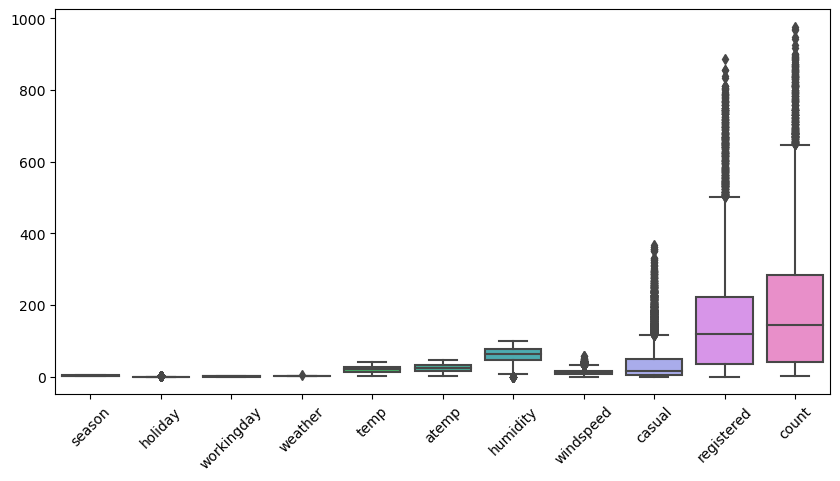

In [30]:
plt.figure(figsize = (10, 5))
sns.boxplot(yulu)
plt.xticks(rotation = 45)
plt.show()


---------------------------------------------------------------------------------------------------------------------------

**Data Cleaning -** 
    
        Check for Missing values & Duplicates.
        

In [32]:
yulu.isnull().sum().sort_values(ascending = False)


datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

In [34]:
yulu[yulu.duplicated()]


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count


**Comment -**

    No null values & duplicate values present in dataset
    

---------------------------------------------------------------------------------------------------------------------------

**Changing the datatypes of attributes -**


            1) datetime - to datetime
            
            2) season - to categorical
            
            3) holiday - to categorical
            
            4) working day - to categorical
            
            5) weather - to categorical
        
        

In [119]:
# Date time column from object to date time.
yulu['datetime'] = pd.to_datetime(yulu['datetime'])


In [120]:
# Season column from int to object data type.
yulu['season'] = yulu["season"].astype('object')


In [121]:
# Holiday column from int to object data type.
yulu['holiday'] = yulu["holiday"].astype('object')


In [122]:
# Working day column from int to object date type.
yulu['workingday'] = yulu["workingday"].astype('object')


In [123]:
# Weather column from int to object date type.
yulu['weather'] = yulu["weather"].astype('object')


In [124]:
yulu.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    10886 non-null  datetime64[ns]
 1   season      10886 non-null  object        
 2   holiday     10886 non-null  object        
 3   workingday  10886 non-null  object        
 4   weather     10886 non-null  object        
 5   temp        10886 non-null  float64       
 6   atemp       10886 non-null  float64       
 7   humidity    10886 non-null  int64         
 8   windspeed   10886 non-null  float64       
 9   casual      10886 non-null  int64         
 10  registered  10886 non-null  int64         
 11  count       10886 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(4), object(4)
memory usage: 1020.7+ KB


---------------------------------------------------------------------------------------------------------------------------

**Extract Hour , Month, Year column from Datetime column -**


In [125]:
yulu['hour'] = yulu['datetime'].dt.hour


In [126]:
yulu['month'] = yulu['datetime'].dt.month


In [127]:
yulu['year'] = yulu['datetime'].dt.year


In [128]:
yulu.head()


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,hour,month,year
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,0,1,2011
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,1,1,2011
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2,1,2011
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,3,1,2011
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,4,1,2011


---------------------------------------------------------------------------------------------------------------------------

**Non Graphical Analysis -**


In [52]:
# season wise unique value & count -
yulu["season"].value_counts()


4    2734
2    2733
3    2733
1    2686
Name: season, dtype: int64

In [54]:
yulu["season"].value_counts(normalize = True).round(4) * 100


4    25.11
2    25.11
3    25.11
1    24.67
Name: season, dtype: float64

**Comments -**

        1) we have four types of seasons namely 1(spring), 2(summer), 3(fall), 4(winter) 
        
            which are having nearly same count in the given dataset.


---------------------------------------------------------------------------------------------------------------------------

In [55]:
# holiday wise unique value & count -
yulu["holiday"].value_counts()


0    10575
1      311
Name: holiday, dtype: int64

In [57]:
yulu["holiday"].value_counts(normalize = True).round(2) * 100


0    97.0
1     3.0
Name: holiday, dtype: float64

**Comments -**

        1) We have only 311 days (i.e. 3%) holiday in overall dataset.


---------------------------------------------------------------------------------------------------------------------------

In [39]:
# working day wise unique value & count -
yulu["workingday"].value_counts()


1    7412
0    3474
Name: workingday, dtype: int64

In [58]:
yulu["workingday"].value_counts(normalize = True).round(2) * 100


1    68.0
0    32.0
Name: workingday, dtype: float64

**Comments -**

        1) From the dataset, there are 68% weekdays & 32% weekend and holidays.


---------------------------------------------------------------------------------------------------------------------------

In [59]:
# weather wise unique value & count -
yulu["weather"].value_counts()


1    7192
2    2834
3     859
4       1
Name: weather, dtype: int64

In [63]:
yulu["weather"].value_counts(normalize = True).round(4) * 100


1    66.07
2    26.03
3     7.89
4     0.01
Name: weather, dtype: float64

**Comments -**

        1) So, we have 4 types of weather -
        
            1 represents Clear, Few clouds, partly cloudy, partly cloudy = 66% (max)
             
            2 represents Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist = 26% (medium)
            
            3 represents Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds 
            
              = 8% (less)
            
            4 represents Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog = 0.01% (very low)
            


---------------------------------------------------------------------------------------------------------------------------

In [85]:
# temp wise unique value & count -
yulu["temp"].value_counts().head()


14.76    467
26.24    453
28.70    427
13.94    413
18.86    406
Name: temp, dtype: int64

In [68]:
yulu["temp"].max()


41.0

In [69]:
yulu["temp"].min()


0.82

**Comments -**

        1) we have data of temperature in celcius ranging from 0.82 - 41.0 degree celcius.


---------------------------------------------------------------------------------------------------------------------------

In [84]:
# atemp wise unique value & count -
yulu["atemp"].value_counts().head()


31.060    671
25.760    423
22.725    406
20.455    400
26.515    395
Name: atemp, dtype: int64

In [71]:
yulu["atemp"].max()


45.455

In [72]:
yulu["atemp"].min()


0.76

**Comments -**

        1) we have feeling temperature data in celcius ranging from 0.76 - 45.455 degree celcius.


---------------------------------------------------------------------------------------------------------------------------

In [74]:
# humidity wise unique value & count -
yulu["humidity"].value_counts()


88    368
94    324
83    316
87    289
70    259
     ... 
8       1
10      1
97      1
96      1
91      1
Name: humidity, Length: 89, dtype: int64

In [75]:
yulu["humidity"].max()


100

In [76]:
yulu["humidity"].min()


0

**Comments -**

        1) we have humidity data ranging from 0 - 100 units.


---------------------------------------------------------------------------------------------------------------------------

In [86]:
# windspeed wise unique value & count -
yulu["windspeed"].value_counts().head()


0.0000     1313
8.9981     1120
11.0014    1057
12.9980    1042
7.0015     1034
Name: windspeed, dtype: int64

In [81]:
yulu["windspeed"].max()


56.9969

In [83]:
yulu["windspeed"].min()


0.0

**Comments -**

        1) we have windspeed data ranging from 0.0 - 56.99 units.


---------------------------------------------------------------------------------------------------------------------------

In [92]:
# casual unique value & count -
yulu["casual"].value_counts()


0      986
1      667
2      487
3      438
4      354
      ... 
332      1
361      1
356      1
331      1
304      1
Name: casual, Length: 309, dtype: int64

In [95]:
yulu["casual"].max()


367

In [96]:
yulu["casual"].min()


0

**Comments -**

        1) we have casual count ranging from 0 to 367.


---------------------------------------------------------------------------------------------------------------------------

In [93]:
# registered unique value & count -
yulu["registered"].value_counts()


3      195
4      190
5      177
6      155
2      150
      ... 
570      1
422      1
678      1
565      1
636      1
Name: registered, Length: 731, dtype: int64

In [97]:
yulu["registered"].max()


886

In [98]:
yulu["registered"].min()


0

**Comments -**

        1) we have registered count ranging from 0 to 886.


---------------------------------------------------------------------------------------------------------------------------

In [94]:
# total unique value & count -
yulu["count"].value_counts()


5      169
4      149
3      144
6      135
2      132
      ... 
801      1
629      1
825      1
589      1
636      1
Name: count, Length: 822, dtype: int64

In [99]:
yulu["count"].max()


977

In [100]:
yulu["count"].min()


1

**Comments -**

        1) we have registered & casual count ranging from 1 to 977.


---------------------------------------------------------------------------------------------------------------------------

In [102]:
# hour wise unique value & count -
yulu["hour"].value_counts()


12    456
13    456
22    456
21    456
20    456
19    456
18    456
17    456
16    456
15    456
14    456
23    456
11    455
10    455
9     455
8     455
7     455
6     455
0     455
1     454
5     452
2     448
4     442
3     433
Name: hour, dtype: int64

**Comments -**

        1) we have almost equal number of counts for every hour (ranging from 0 - 23 hours).


---------------------------------------------------------------------------------------------------------------------------

In [105]:
# month wise unique value & count -
yulu["month"].value_counts()


5     912
6     912
7     912
8     912
12    912
10    911
11    911
4     909
9     909
2     901
3     901
1     884
Name: month, dtype: int64

**Comments -**

        1) we have almost equal number of counts for every month (ranging from 1 - 12).


---------------------------------------------------------------------------------------------------------------------------

In [106]:
# year wise unique value & count -
yulu["year"].value_counts()


2012    5464
2011    5422
Name: year, dtype: int64

**Comments -**

        1) we have data of year 2011 & 2012 only.


---------------------------------------------------------------------------------------------------------------------------

**Visual Analysis -**


In [109]:
yulu.head()


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,hour,month,year
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,0,1,2011
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,1,1,2011
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2,1,2011
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,3,1,2011
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,4,1,2011


---------------------------------------------------------------------------------------------------------------------------

**A. Univariate Analysis -**


**1. Count Plots -**


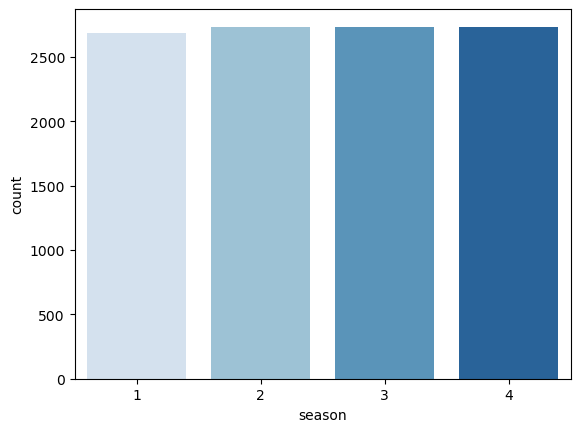

In [108]:
# season countplot -
sns.countplot(x = "season", data = yulu, palette = "Blues")
plt.show()



**Comments -**

        1) From above graph, we have almost equal count for different seasons.


---------------------------------------------------------------------------------------------------------------------------

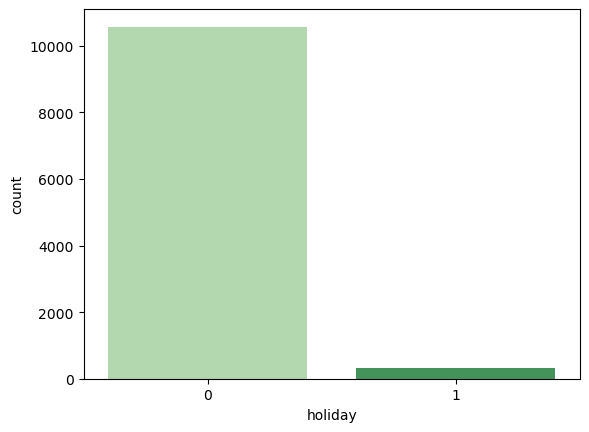

In [114]:
# holiday countplot -
sns.countplot(x = "holiday", data = yulu, palette = "Greens")
plt.show()



**Comments -**

        1) From above graph, we have very low number of holidays.


---------------------------------------------------------------------------------------------------------------------------

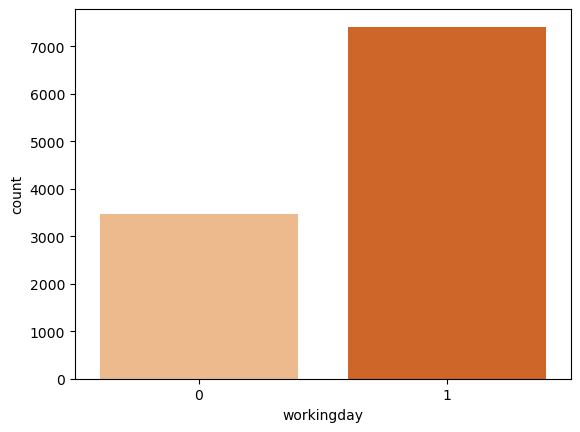

In [116]:
# working day countplot -
sns.countplot(x = "workingday", data = yulu, palette = "Oranges")
plt.show()



**Comments -**

        1) From above graph, we have 7000+ count for working day & nearly 3400 count for non working days 
        
        (i.e. holiday & weekend days).


---------------------------------------------------------------------------------------------------------------------------

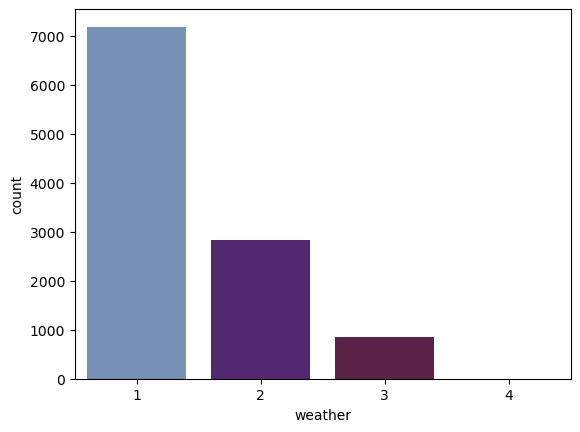

In [117]:
# weather countplot -
sns.countplot(x = "weather", data = yulu, palette = "twilight")
plt.show()



**Comments -**

        1) From above graph, we have maximum count(7000+) for type 1 weather 
        
          (i.e. Clear, Few clouds, partly cloudy, partly cloudy)
          


---------------------------------------------------------------------------------------------------------------------------

**2. Histogram Plots -**


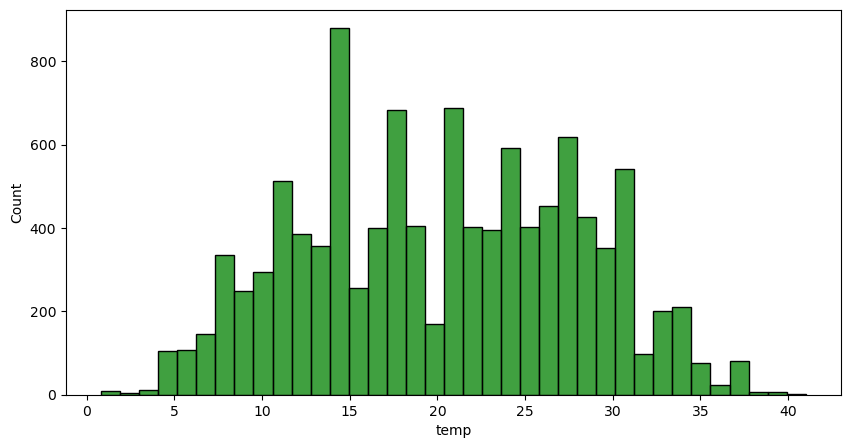

In [15]:
# temperature Histogram Plot -
plt.figure(figsize = (10, 5))
sns.histplot(yulu["temp"], color = "g")
plt.show()



**Comment -**

    Temperature count is in the range of 0 - 40 degree celcius.



---------------------------------------------------------------------------------------------------------------------------

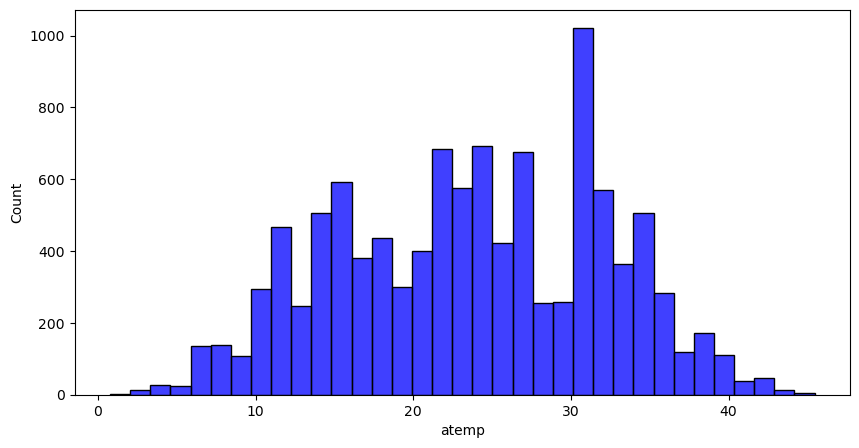

In [22]:
# Feeling temperature Histogram Plot -
plt.figure(figsize = (10, 5))
sns.histplot(yulu["atemp"], color = "b")
plt.show()



**Comment -**

    Feeling Temperature count is in the range of 0 - 40+ degree celcius.



---------------------------------------------------------------------------------------------------------------------------

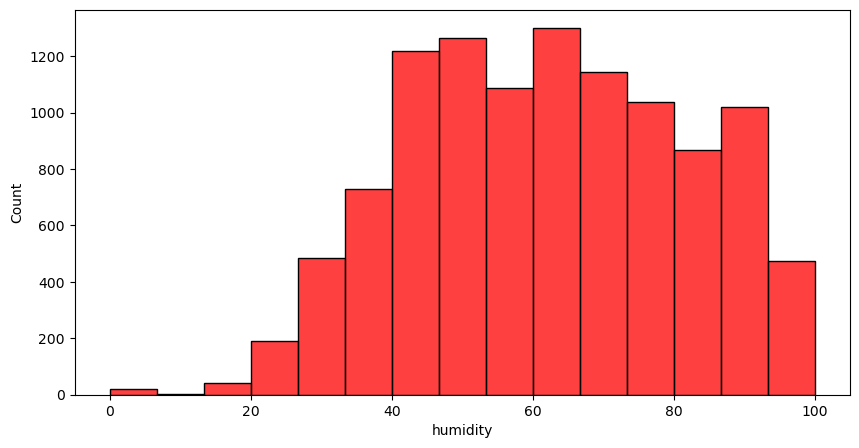

In [32]:
# Humidity Histogram Plot -
plt.figure(figsize = (10, 5))
sns.histplot(yulu["humidity"], color = "r", bins = 15)
plt.show()



**Comment -**

    Humidity count is in the range of 0 - 100 Units.



---------------------------------------------------------------------------------------------------------------------------

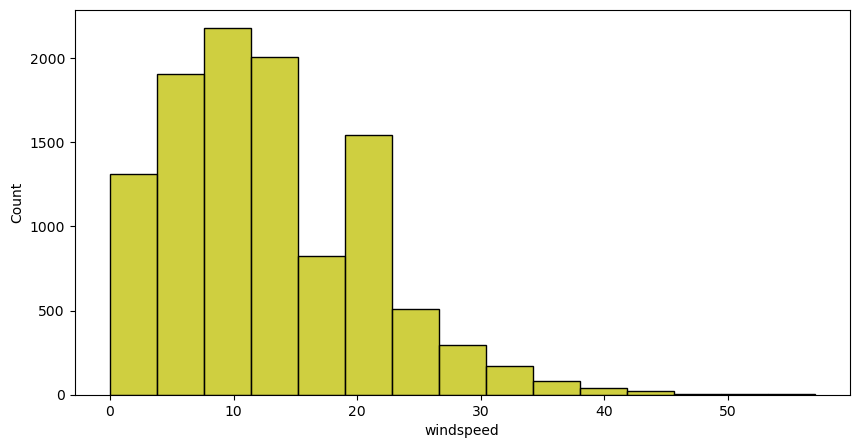

In [31]:
# Windspeed Histogram Plot -
plt.figure(figsize = (10, 5))
sns.histplot(yulu["windspeed"], color = "y", bins = 15)
plt.show()



**Comment -**

    Windspeed count is in the range of 0 - 50+ Units.



---------------------------------------------------------------------------------------------------------------------------

**3. Bar Plots -**


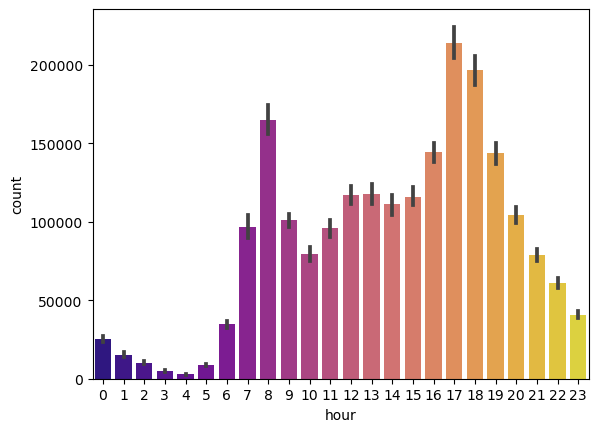

In [52]:
# Hour vs Total count barplot
sns.barplot(y ='count', x = 'hour', data = yulu, estimator = 'sum', palette = "plasma")
plt.show()


**Comment -**

    Total count or demand is maximum for hours 8, 17, & 18.



---------------------------------------------------------------------------------------------------------------------------

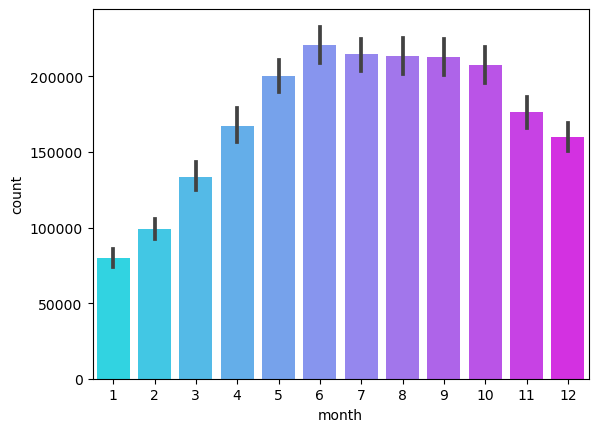

In [53]:
# Month vs Total count barplot
sns.barplot(y ='count', x = 'month', data = yulu, estimator = 'sum', palette = "cool")
plt.show()


**Comment -**

    Total count or demand is maximum for months 6, 7, 8, 9, 10.



---------------------------------------------------------------------------------------------------------------------------

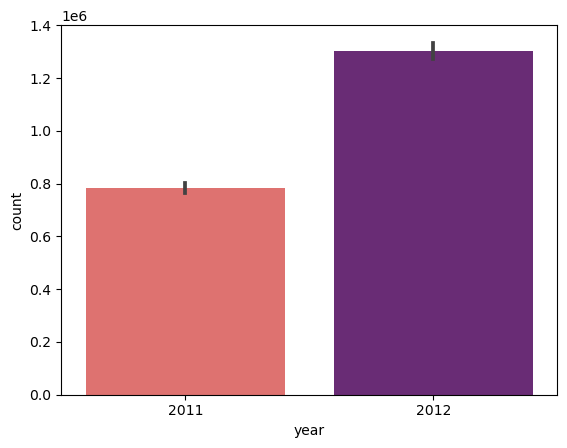

In [54]:
# Year vs Total count barplot
sns.barplot(y ='count', x = 'year', data = yulu, estimator = 'sum', palette = "magma_r")
plt.show()


**Comment -**

    Total count or demand is maximum for the year 2012.



---------------------------------------------------------------------------------------------------------------------------

**4. Box Plots -**

    To detect whether outliers present or not 
    

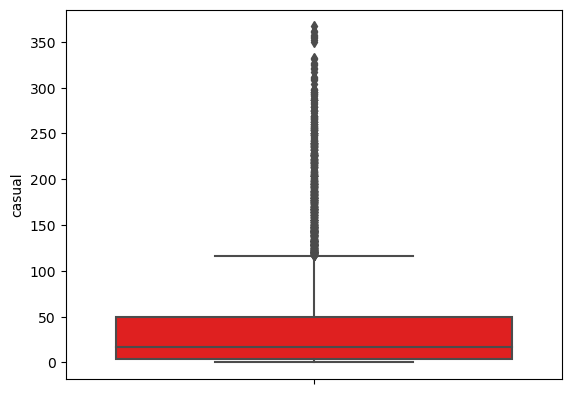

In [35]:
# Casual count Box Plot -
sns.boxplot(y = "casual", data = yulu, color = "r")
plt.show()


**Comment -**

    Outliers are present (i.e Casual count above 100.)
    

---------------------------------------------------------------------------------------------------------------------------

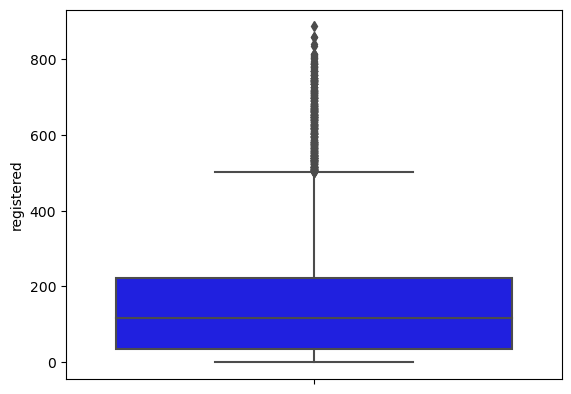

In [37]:
# registered count Box Plot -
sns.boxplot(y = "registered", data = yulu, color = "b")
plt.show()


**Comment -**

    Outliers are present (i.e Registered count above 500.)
    

---------------------------------------------------------------------------------------------------------------------------

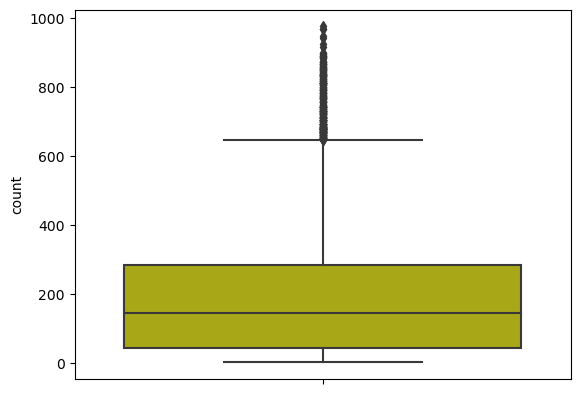

In [38]:
# Total count Box Plot -
sns.boxplot(y = "count", data = yulu, color = "y")
plt.show()


**Comment -**

    Outliers are present (i.e Total count above 600.)
    

---------------------------------------------------------------------------------------------------------------------------

**B. Bivariate Analysis -**



**1. Histogram Plots -**



In [56]:
yulu.head()


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,hour,month,year
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,0,1,2011
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,1,1,2011
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2,1,2011
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,3,1,2011
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,4,1,2011


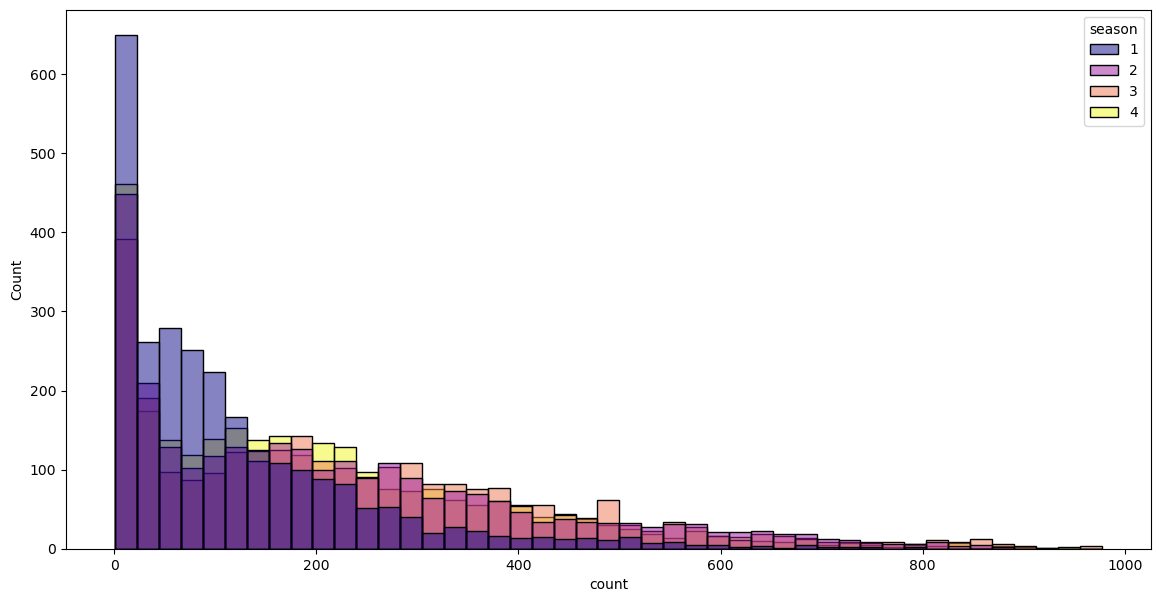

In [66]:
# Total count with respect to season -
plt.figure(figsize = (14, 7))
sns.histplot(x = "count", data = yulu, hue = "season", palette = "plasma")
plt.show()


**Comment -**

    Demand i.e total count is season 1 is more w.r.t other seasons.
    

---------------------------------------------------------------------------------------------------------------------------

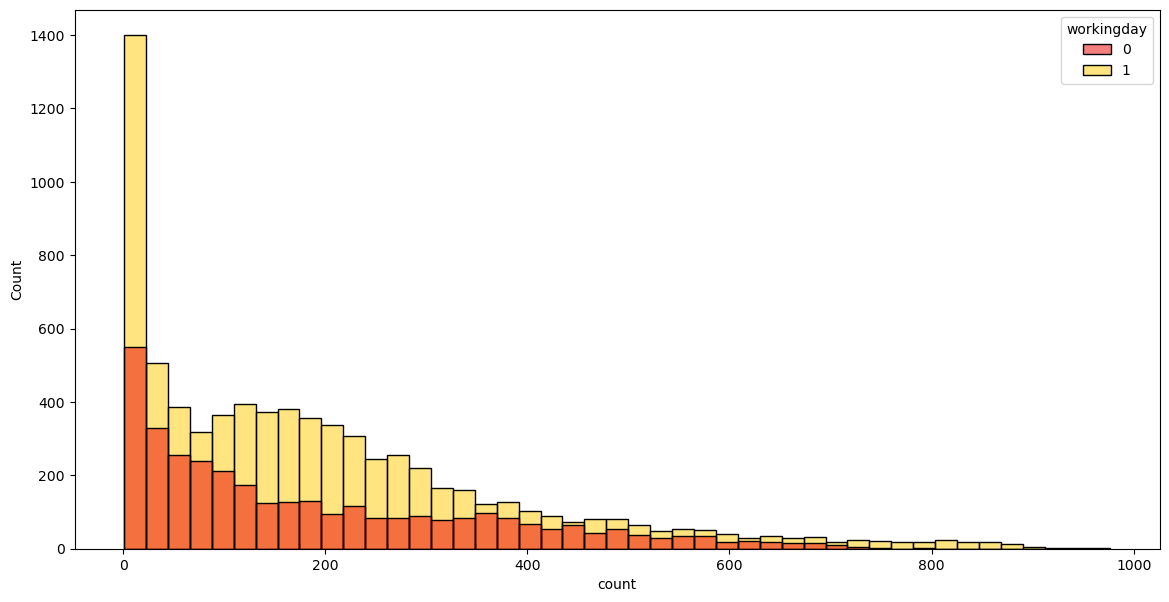

In [70]:
# Total count with respect to working day-
plt.figure(figsize = (14, 7))
sns.histplot(x = "count", data = yulu, hue = "workingday", palette = "hot")
plt.show()


**Comment -**

    Demand in working days are more than in weekend or holidays.
    

---------------------------------------------------------------------------------------------------------------------------

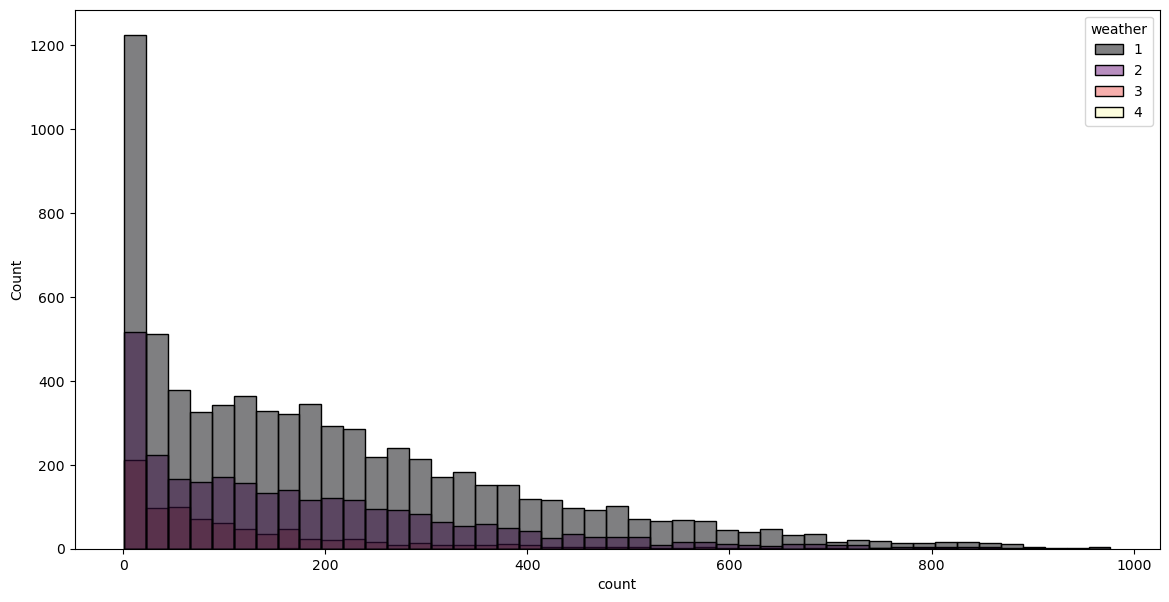

In [77]:
# Total count with respect to weather-
plt.figure(figsize = (14, 7))
sns.histplot(x = "count", data = yulu, hue = "weather", palette = "magma")
plt.show()


**Comment -**

    People mostly prefer yulu bikes in weather 1 conditions as compared to other weather conditions.
    

---------------------------------------------------------------------------------------------------------------------------

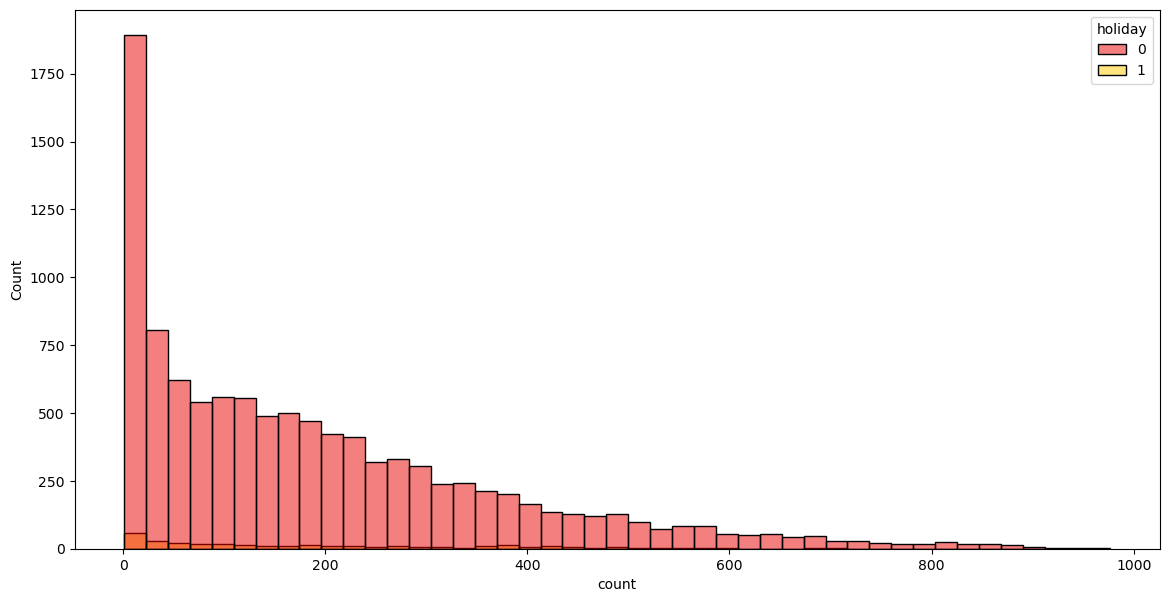

In [79]:
# Total count with respect to holiday-
plt.figure(figsize = (14, 7))
sns.histplot(x = "count", data = yulu, hue = "holiday", palette = "hot")
plt.show()


---------------------------------------------------------------------------------------------------------------------------

**Comment -**

    From the above graph, we can conclude that the demand is very low in holidays.
    

---------------------------------------------------------------------------------------------------------------------------

**2. Box Plots -**


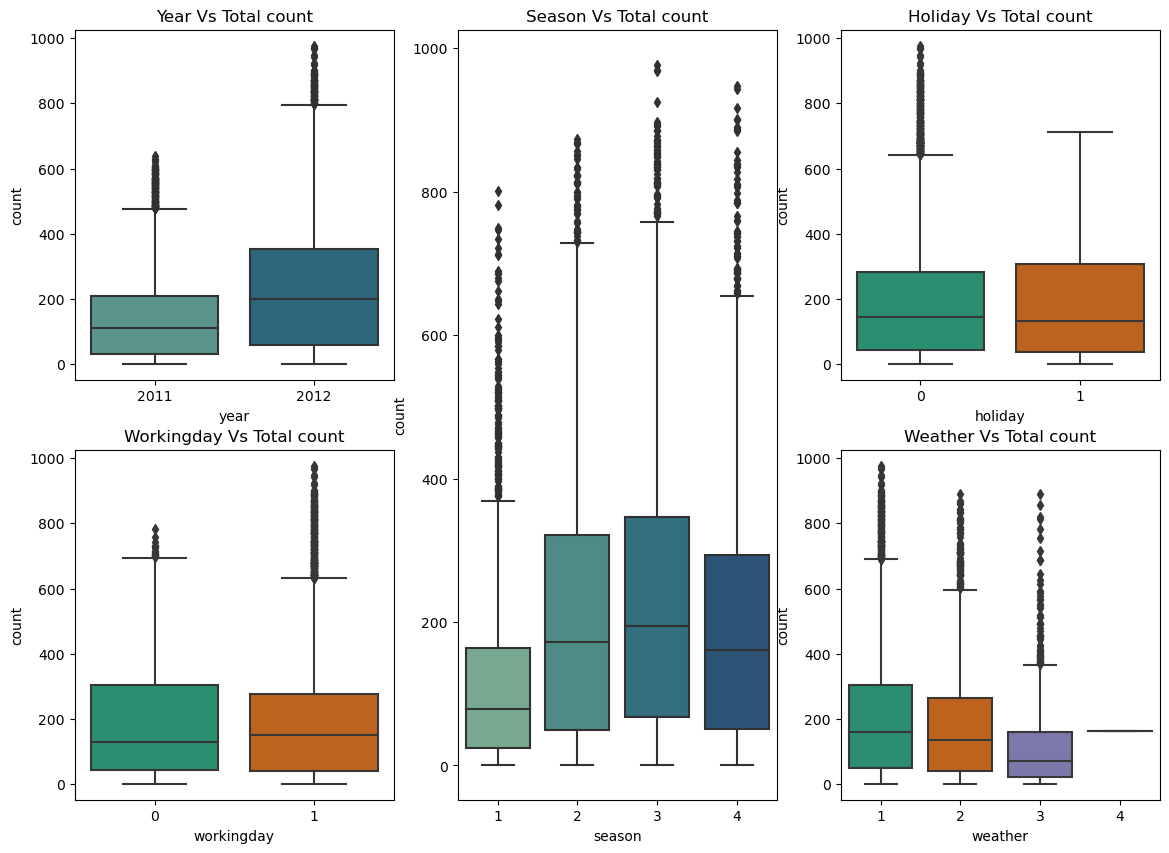

In [114]:
# 1) Various Factors vs Total count (Year, Season, Holiday, Working day, Weather)

plt.figure(figsize = (14, 10))

plt.subplot(2, 3, 1)
sns.boxplot(x = "year", y = "count", data = yulu, palette = "crest")
plt.title("Year Vs Total count", fontsize = 12)

plt.subplot(2, 3, 3)
sns.boxplot(x = "holiday", y = "count", data = yulu, palette = "Dark2")
plt.title("Holiday Vs Total count", fontsize = 12)

plt.subplot(2, 3, 4)
sns.boxplot(x = "workingday", y = "count", data = yulu, palette = "Dark2")
plt.title("Workingday Vs Total count", fontsize = 12)

plt.subplot(2, 3, 6)
sns.boxplot(x = "weather", y = "count", data = yulu, palette = "Dark2")
plt.title("Weather Vs Total count", fontsize = 12)

plt.subplot(1, 3, 2)
sns.boxplot(x = "season", y = "count", data = yulu, palette = "crest")
plt.title("Season Vs Total count", fontsize = 12)


plt.show()


---------------------------------------------------------------------------------------------------------------------------

**Comment -**

    From the above Box Plot -
    
        1) Median count for year 2012 is greater than year 2011.
        
        2) Median count for holiday is same.    
        
        3) There is slight difference in median count of working day factor.
    
        4) Median count for every season is almost different.
 
        5) Median count for weather varies a lot.
    
    

---------------------------------------------------------------------------------------------------------------------------

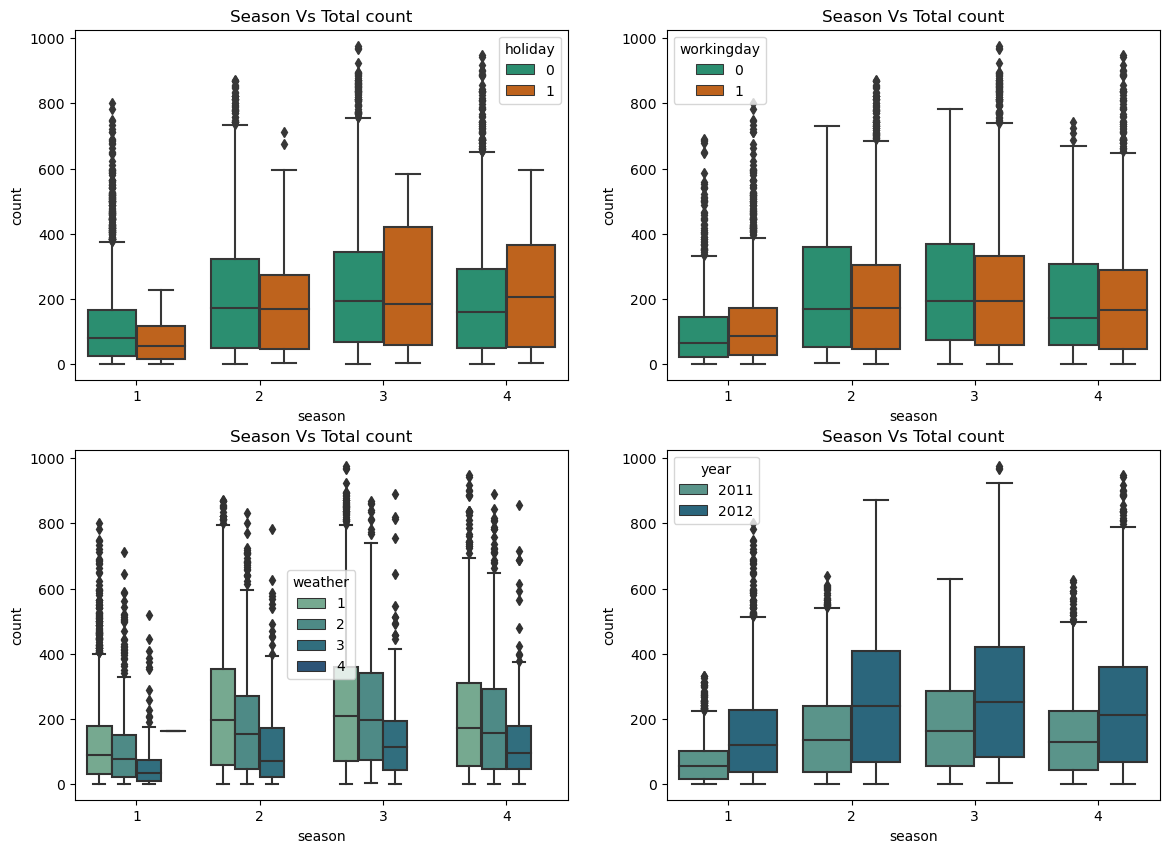

In [118]:
# 2) Season vs Total Count (With hue as holiday, working day & weather)

plt.figure(figsize = (14, 10))

plt.subplot(2, 2, 1)
sns.boxplot(data = yulu, x = "season", y = "count", hue = "holiday", palette = "Dark2")
plt.title("Season Vs Total count", fontsize = 12)

plt.subplot(2, 2, 2)
sns.boxplot(data = yulu, x = "season", y = "count", hue = "workingday", palette = "Dark2")
plt.title("Season Vs Total count", fontsize = 12)

plt.subplot(2, 2, 3)
sns.boxplot(data = yulu, x = "season", y = "count", hue = "weather", palette = "crest")
plt.title("Season Vs Total count", fontsize = 12)

plt.subplot(2, 2, 4)
sns.boxplot(data = yulu, x = "season", y = "count", hue = "year", palette = "crest")
plt.title("Season Vs Total count", fontsize = 12)

plt.show()


**Comment -**

    From the above Box Plot -
    
        1) For holiday and working day attributes, the distribution of median count across every season is varying a lot.
        
        2) For weather 1, the median count is maximum among all the seasons (especially for season 2, 3 & 4)
        
        3) For Year 2012, the median count is maximum for every seasons (especially for season 2, 3 & 4)
    
    

---------------------------------------------------------------------------------------------------------------------------

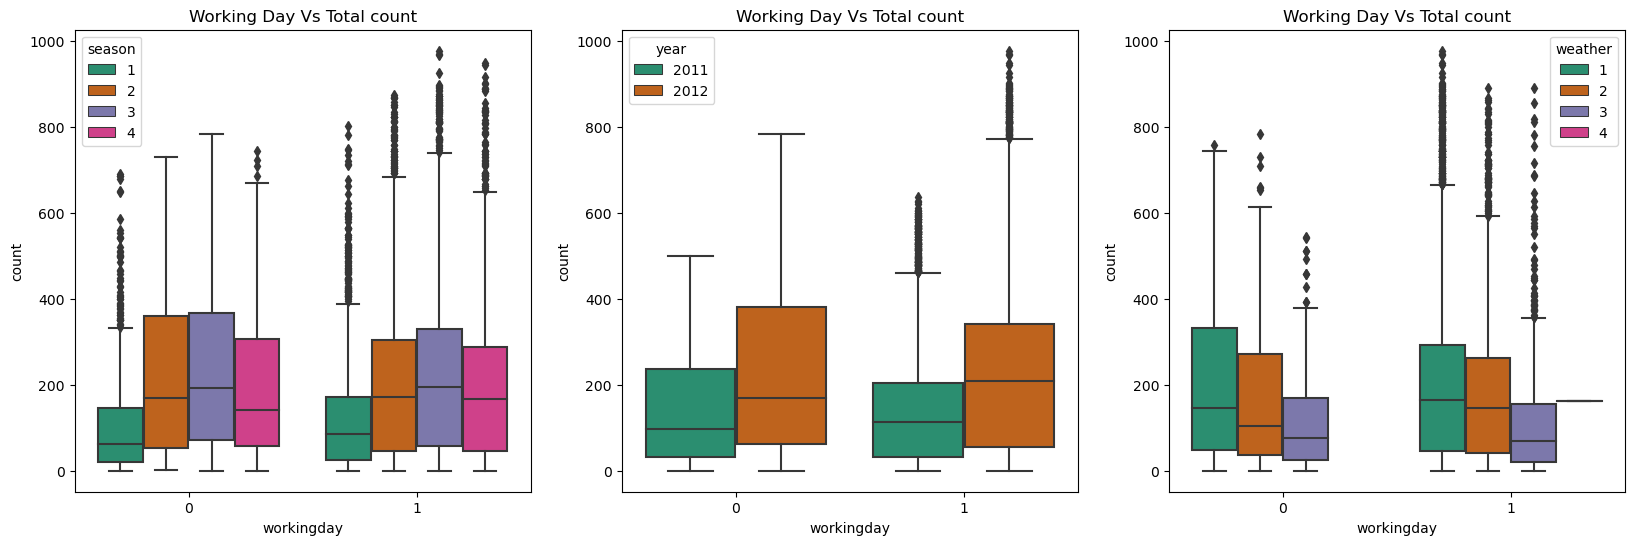

In [123]:
# 3) Working Day vs Total Count (With hue as Season & weather)

plt.figure(figsize = (20, 6))

plt.subplot(1, 3, 1)
sns.boxplot(data = yulu, x = "workingday", y = "count", hue = "season", palette = "Dark2")
plt.title("Working Day Vs Total count", fontsize = 12)

plt.subplot(1, 3, 2)
sns.boxplot(data = yulu, x = "workingday", y = "count", hue = "year", palette = "Dark2")
plt.title("Working Day Vs Total count", fontsize = 12)

plt.subplot(1, 3, 3)
sns.boxplot(data = yulu, x = "workingday", y = "count", hue = "weather", palette = "Dark2")
plt.title("Working Day Vs Total count", fontsize = 12)

plt.show()


**Comment -**

    From the above Box Plot -
    
        1) For season 3, the median count is maximum for working & non working day.
        
        2) For year 2012, the median count of working & non working day is maximum.
        
        3) For weather 1, the median count is maximum for both working & non working day
    
    

---------------------------------------------------------------------------------------------------------------------------

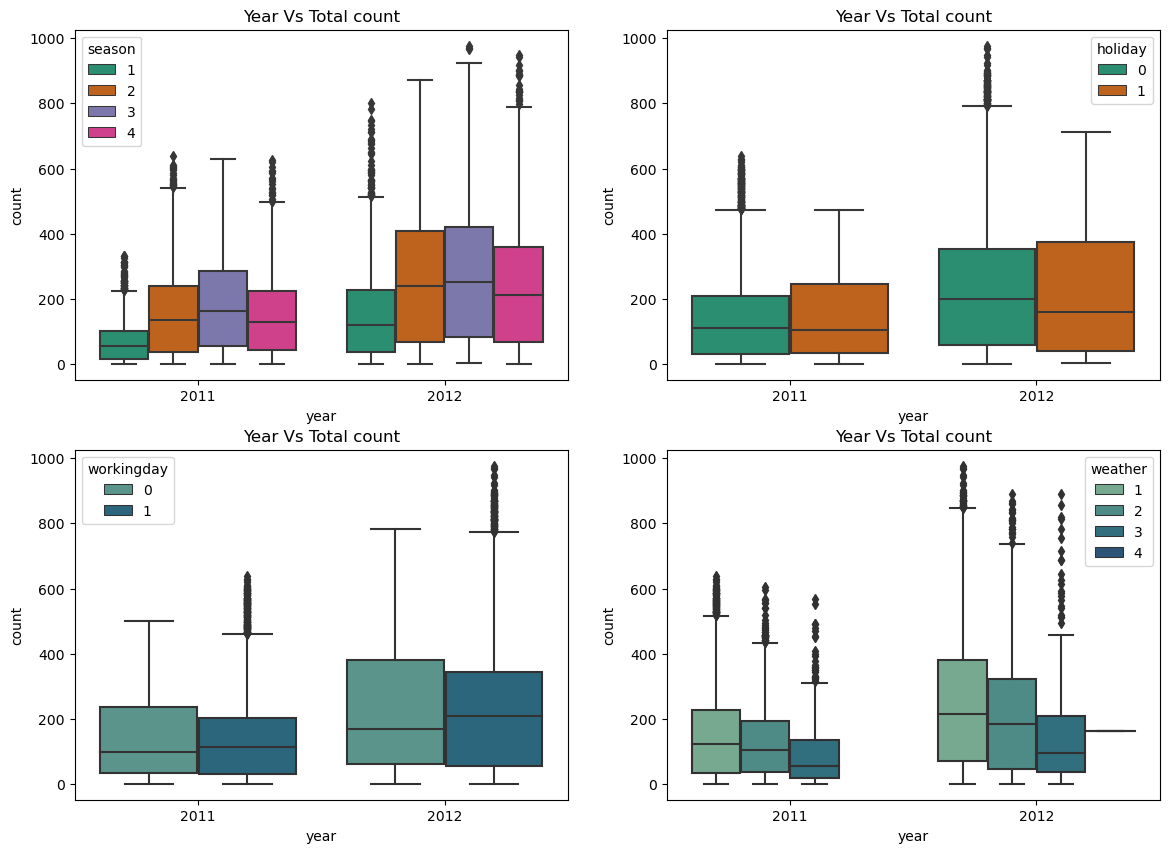

In [122]:
# 4) Year vs Total Count (With hue as Season, Holiday, Working day & weather)

plt.figure(figsize = (14, 10))

plt.subplot(2, 2, 1)
sns.boxplot(data = yulu, x = "year", y = "count", hue = "season", palette = "Dark2")
plt.title("Year Vs Total count", fontsize = 12)

plt.subplot(2, 2, 2)
sns.boxplot(data = yulu, x = "year", y = "count", hue = "holiday", palette = "Dark2")
plt.title("Year Vs Total count", fontsize = 12)

plt.subplot(2, 2, 3)
sns.boxplot(data = yulu, x = "year", y = "count", hue = "workingday", palette = "crest")
plt.title("Year Vs Total count", fontsize = 12)

plt.subplot(2, 2, 4)
sns.boxplot(data = yulu, x = "year", y = "count", hue = "weather", palette = "crest")
plt.title("Year Vs Total count", fontsize = 12)

plt.show()


**Comments -**

    1) In every cases such as season, holiday, working day & weather, the median count for year 2012 is higher 
    
       as compared to year 2011.
    
    
    
    

---------------------------------------------------------------------------------------------------------------------------

**C. Multivariate Analysis -**

    To check correlation



**1. Correlation (Heatmaps)  -**


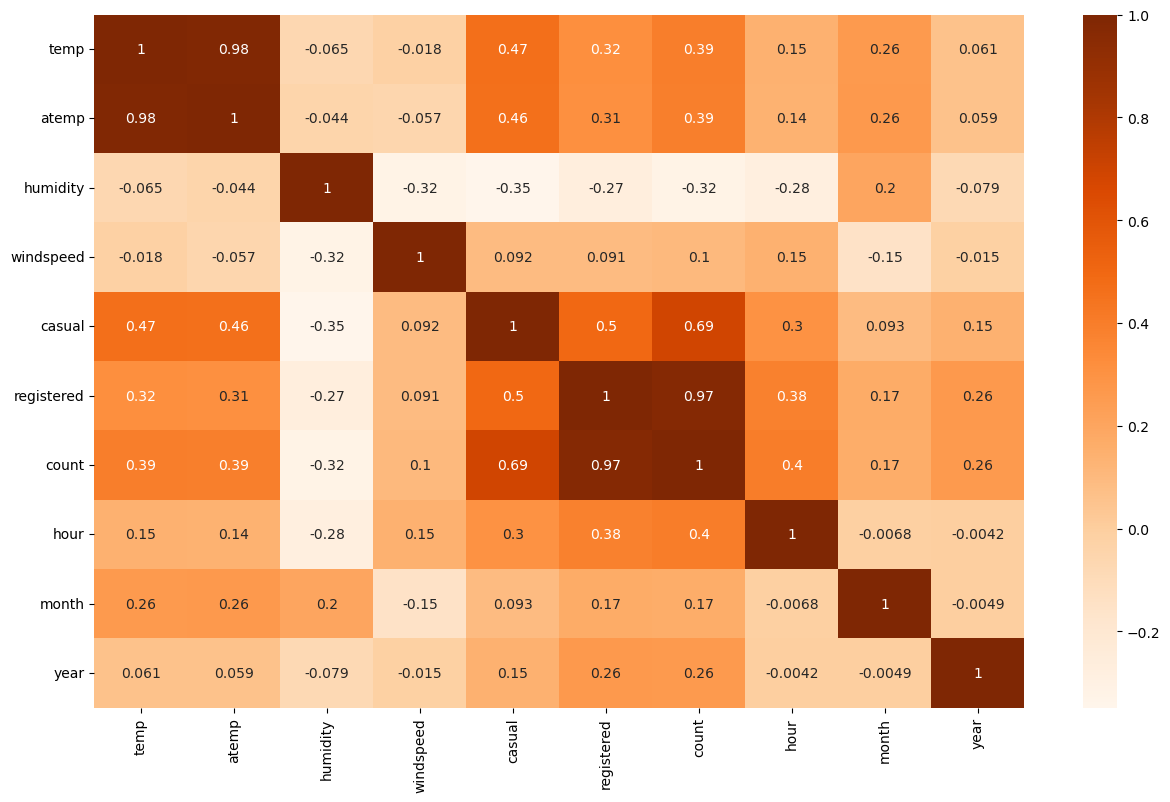

In [131]:
# Heatmaps -
plt.figure(figsize = (15, 9))
sns.heatmap(yulu.corr(), annot = True, cmap = "Oranges")
plt.xticks(rotation = 90)
plt.yticks(rotation = 0)
plt.show()


 **Comments -** 
 
 
        1) There is also somewhat positive relation between count and temp(0.39) & atemp(0.39)
        
            which suggests that as the temperature increases, the count also increases
            
        
        2) count and humidity have a negative correlation of -0.32. This means that as humidity increases, 
        
            the bike count tends to decrease.
            
    
        3) There is strong positive correlation between count with casual(0.69) and registered(0.97) 
            
            which is obvious as it is sum of those two variables
        
        
        4) There is somewhat a strong positive relation between count and hour(0.40).
        

        


---------------------------------------------------------------------------------------------------------------------------

**D. Hypothesis Testing -**


**1) 2 sample T test -**

        Checking whether Working Day has an effect on the number of electric cycles rented -
        
        

In [13]:
yulu.head()


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,hour,month,year
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,0,1,2011
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,1,1,2011
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2,1,2011
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,3,1,2011
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,4,1,2011


    
    Null & Alternate Hypothesis -
    
        1. H0 : Working day has no effect on the number of cycles being rented 
        
                (i.e. mean is same for both working day count & non working day count).
                
        
        2. Ha : Working day has effect on the number of cycles being rented.
        
                (i.e. mean is different for both working day count & non working day count).






In [129]:
working = yulu[yulu["workingday"] == 1]
working.head()


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,hour,month,year
47,2011-01-03 00:00:00,1,0,1,1,9.02,9.850,44,23.9994,0,5,5,0,1,2011
48,2011-01-03 01:00:00,1,0,1,1,8.20,8.335,44,27.9993,0,2,2,1,1,2011
49,2011-01-03 04:00:00,1,0,1,1,6.56,6.820,47,26.0027,0,1,1,4,1,2011
50,2011-01-03 05:00:00,1,0,1,1,6.56,6.820,47,19.0012,0,3,3,5,1,2011
51,2011-01-03 06:00:00,1,0,1,1,5.74,5.305,50,26.0027,0,30,30,6,1,2011


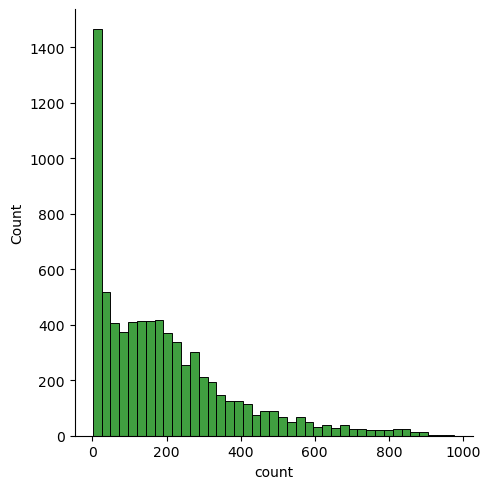

In [130]:
sns.displot(working, x = 'count', color = "g")
plt.show()


In [131]:
non_working = yulu[yulu["workingday"] == 0]
non_working.head()


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,hour,month,year
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,0,1,2011
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,1,1,2011
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2,1,2011
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,3,1,2011
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,4,1,2011


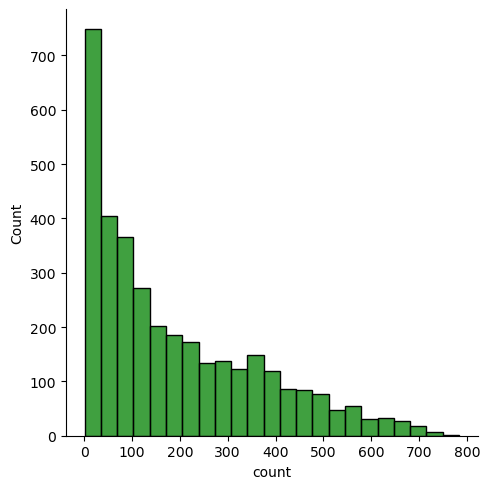

In [137]:
sns.displot(non_working, x = 'count', color = 'g')
plt.show()


In [31]:
working_day = yulu[yulu["workingday"] == 1]["count"]
working_day.head()


47     5
48     2
49     1
50     3
51    30
Name: count, dtype: int64

In [32]:
non_working_day = yulu[yulu["workingday"] == 0]["count"]
non_working_day.head()


0    16
1    40
2    32
3    13
4     1
Name: count, dtype: int64

In [33]:
working_day.mean()


193.01187263896384

In [34]:
non_working_day.mean()


188.50662061024755

In [36]:
t_val, p_val = ttest_ind(working_day, non_working_day)
p_val


0.22644804226361348

In [42]:
alpha = 0.05


In [43]:
p_val < alpha


False

---------------------------------------------------------------------------------------------------------------------------

**Conclusion -**

    1) p Value(0.226) is greater than the significance value (alpha = 0.05),
    
        Hence we failed to reject Null Hypothesis.
        
    2) So we can say that, Working day has no effect on the number of cycles being rented 
        
        (i.e. mean is same for both working day count & non working day count).
        
        

---------------------------------------------------------------------------------------------------------------------------

**2) Annova / Kruskal-Wallis test -**

        Check whether No. of cycles rented is similar or different in different 
        
            1. weather 
            
            2. season  
        
    
    
    Assumptions of Annova test -
    
        1) Data should be gaussian
        
        2) Independent cells or rows (mutually exclusive).
        
        3) Equal variance in each group.
        
        

**A) Analysis for 'Weather' Part -**

    Checking whether assumptions of Annova tests are followed or not -


    **Visual Graphs -

In [133]:
weather1 = yulu[yulu["weather"] == 1]
weather2 = yulu[yulu["weather"] == 2]
weather3 = yulu[yulu["weather"] == 3]
weather4 = yulu[yulu["weather"] == 4]


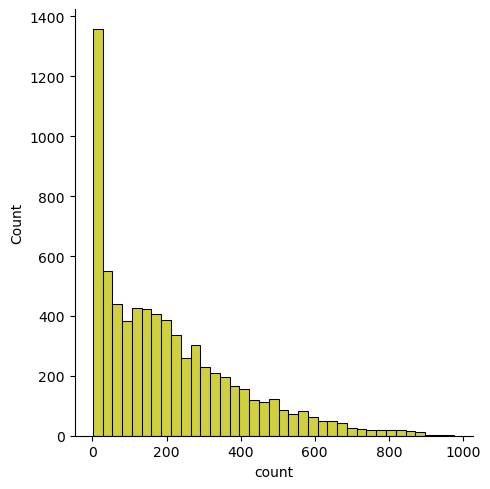

In [138]:
sns.displot(weather1, x = 'count', color = 'y')
plt.show()


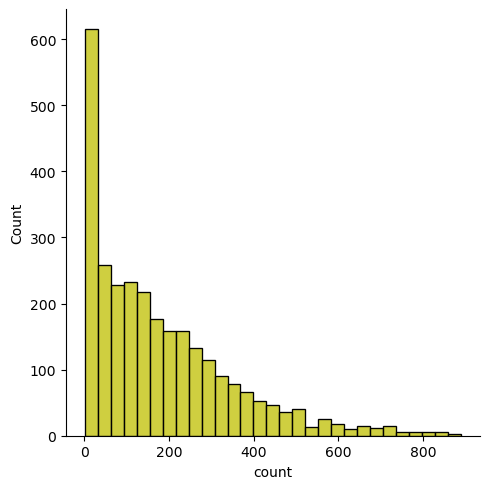

In [136]:
sns.displot(weather2, x = 'count', color = 'y')
plt.show()


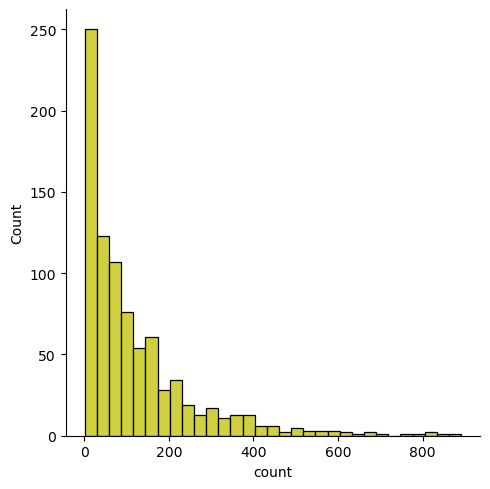

In [139]:
sns.displot(weather3, x = 'count', color = 'y')
plt.show()


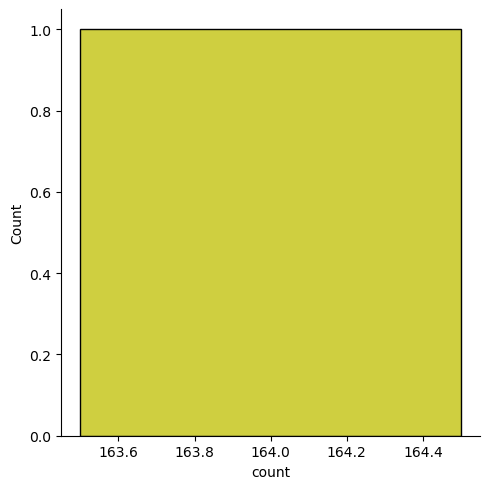

In [140]:
sns.displot(weather4, x = 'count', color = 'y')
plt.show()


<Axes: xlabel='count', ylabel='Count'>

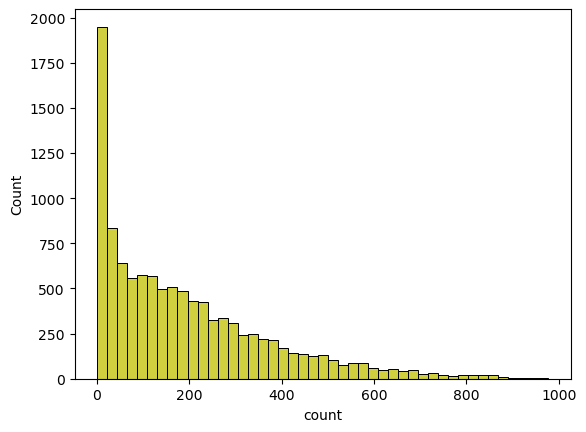

In [141]:
# Total counts -
total_count = yulu["count"]
sns.histplot(total_count, color = 'y')


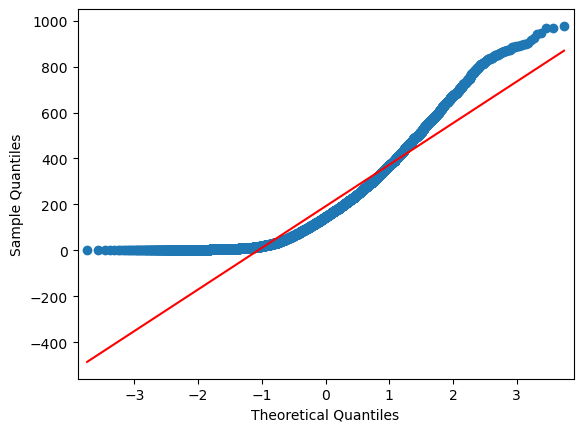

In [143]:
# Q-Q plot (To check whether data is gaussian or not from visual graph)
qqplot(total_count, line = "s")
plt.show()


In [108]:
# Shapiro test - (To check whether data is Gaussian or not by computing p-value)
# Assumptions -
# H0 : Data is gaussian
# Ha : Data is not gaussian

ttl_cnt = total_count.sample(100)
shapiro(ttl_cnt)

# As p-value(5.38e^-08) is lower than alpha(0.05), we reject null hypothesis i.e. the data is not gaussian.


ShapiroResult(statistic=0.8671377897262573, pvalue=5.383072476661255e-08)

In [111]:
# levene test - (To check variance of groups)
# Assumptions -
# H0 : Variances are equal
# Ha : Variances are not equal

weather1 = yulu[yulu["weather"] == 1]["count"]
weather2 = yulu[yulu["weather"] == 2]["count"]
weather3 = yulu[yulu["weather"] == 3]["count"]
weather4 = yulu[yulu["weather"] == 4]["count"]


levene(weather1, weather2, weather3, weather4)

# As p-value(3.50e^-35) is lower than alpha(0.05), we reject null hypothesis i.e. the Variances are not equal.


LeveneResult(statistic=54.85106195954556, pvalue=3.504937946833238e-35)

---------------------------------------------------------------------------------------------------------------------------

    From above visual graphs, Q-Q plots, shapiro test & levene test 
    
        the data seems to be non-gaussian in nature, we cannot use Annova test 
        
        So, we will use Kruskal-Wallis Test to check the hypothesis.
        
        

---------------------------------------------------------------------------------------------------------------------------

    **Kruskal-Wallis test -

        Null & Alternate Hypothesis -

            1. H0 : Number of cycles rented is similar in different weather.
            
                    (Average is same for all groups).


            2. Ha : Number of cycles rented is different in different weather.
            
                    (Average is not same for all groups).
                    
                    

In [55]:
weather1.mean()


205.23679087875416

In [56]:
weather2.mean()


178.95553987297106

In [57]:
weather3.mean()


118.84633294528521

In [58]:
weather4.mean()


164.0

In [65]:
# Kruskal-Wallis Test -
stats, p_val = kruskal(weather1, weather2, weather3, weather4)
p_val


3.501611300708679e-44

In [66]:
alpha = 0.05


In [67]:
p_val < alpha


True

---------------------------------------------------------------------------------------------------------------------------

**Conclusion -**

    1) p Value(3.50e^-44) is less than the significance value (alpha = 0.05),
    
        Hence we reject Null Hypothesis.
        
    2) So we can say that, Number of cycles rented is different in different weather.
        
        (i.e. Average is not same for all groups).
        
        

---------------------------------------------------------------------------------------------------------------------------

**B) Analysis for 'Season' Part -**


        Checking whether assumptions of Annova test are followed or not -


    **Visual Graphs -

In [144]:
spring = yulu[yulu["season"] == 1]
summer = yulu[yulu["season"] == 2]
fall = yulu[yulu["season"] == 3]
winter = yulu[yulu["season"] == 4]


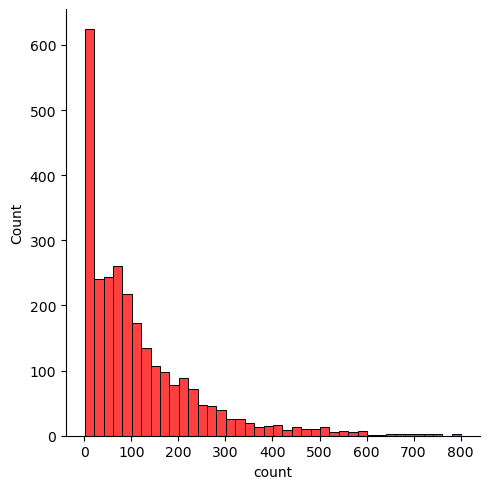

In [145]:
sns.displot(spring, x = 'count', color = 'r')
plt.show()


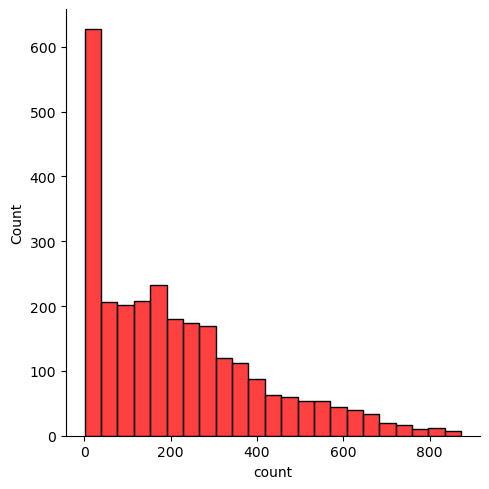

In [146]:
sns.displot(summer, x = 'count', color = 'r')
plt.show()


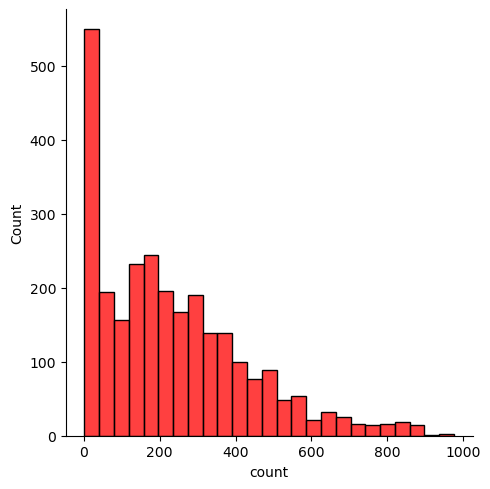

In [147]:
sns.displot(fall, x = 'count', color = 'r')
plt.show()


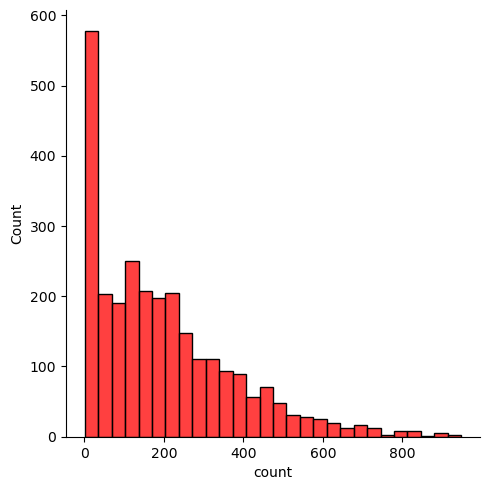

In [148]:
sns.displot(winter, x = 'count', color = 'r')
plt.show()


In [113]:
# levene test - (To check variance of groups)
# Assumptions -
# H0 : Variances are equal
# Ha : Variances are not equal

spring_1 = yulu[yulu["season"] == 1]["count"]
summer_2 = yulu[yulu["season"] == 2]["count"]
fall_3 = yulu[yulu["season"] == 3]["count"]
winter_4 = yulu[yulu["season"] == 4]["count"]


levene(spring_1, summer_2, fall_3, winter_4)

# As p-value(1.014e^-118) is lower than alpha(0.05), we reject null hypothesis i.e. the Variances are not equal.


LeveneResult(statistic=187.7706624026276, pvalue=1.0147116860043298e-118)

    From above visual graphs & levene test -
    
        the data seems to be non-gaussian in nature, we cannot use the Annova test 
        
        So, we will use Kruskal-Wallis Test to check the hypothesis.
        
        

    **Kruskal-Wallis test -
        
        Null & Alternate Hypothesis -

            1. H0 : Number of cycles rented is similar in different season.
            
                    (Average is same for all groups).


            2. Ha : Number of cycles rented is different in different season.
            
                    (Average is not same for all groups).
                    
                    

In [85]:
spring_1.mean()


116.34326135517499

In [86]:
summer_2.mean()


215.25137211855105

In [87]:
fall_3.mean()


234.417124039517

In [88]:
winter_4.mean()


198.98829553767374

In [89]:
# Kruskal-Wallis Test -
stats, p_val = kruskal(spring_1, summer_2, fall_3, winter_4)
p_val


2.479008372608633e-151

In [90]:
alpha = 0.05


In [92]:
p_val < alpha


True

**Conclusion -**

    1) p Value(2.47e^-151) is less than the significance value (alpha = 0.05),
    
        Hence we reject Null Hypothesis.
        
    2) So we can say that, Number of cycles rented is different in different season.
        
        (i.e. Average is not same for all groups).
        
        

---------------------------------------------------------------------------------------------------------------------------

**3) Chi-square test -**

        Check whether Weather is dependent on the season -
        
        

        Null & Alternate Hypothesis -

            1. H0 : Weather & Season are independent.


            2. Ha : Weather & Season are dependent.
         
                    

In [93]:
data = pd.crosstab(index = yulu["weather"], columns = yulu["season"])
data


season,1,2,3,4
weather,,,,
1,1759,1801,1930,1702
2,715,708,604,807
3,211,224,199,225
4,1,0,0,0


In [101]:
p_val = chi2_contingency(data)
p_val


Chi2ContingencyResult(statistic=49.15865559689363, pvalue=1.5499250736864862e-07, dof=9, expected_freq=array([[1.77454639e+03, 1.80559765e+03, 1.80559765e+03, 1.80625831e+03],
       [6.99258130e+02, 7.11493845e+02, 7.11493845e+02, 7.11754180e+02],
       [2.11948742e+02, 2.15657450e+02, 2.15657450e+02, 2.15736359e+02],
       [2.46738931e-01, 2.51056403e-01, 2.51056403e-01, 2.51148264e-01]]))

---------------------------------------------------------------------------------------------------------------------------

**Conclusion -**

    1) p Value(1.54e^-07) is less than the significance value (alpha = 0.05),
    
        Hence we reject Null Hypothesis.
        
    2) So we can say that, Weather & Season are dependent on each other.
       


---------------------------------------------------------------------------------------------------------------------------

**Insights from Data-**



    1) The medians of working day is always higher than non working day irrespective of season & weather.
    
    
    2) Whenever there is rain, thunderstorm, snow or fog, there were less bikes were rented.
    
      
    3) Using 2 sample t-test, we conclude that mean count of both working & non working day is same 
    
       which means working day has no effect on the number of cycles being rented.
       
    
    4) Annova test cannot be performed because the nature of data is not gaussian, 
    
        Hence we carry out testing with kruskal-wallis group test
        
        which gives result as Number of cycles rented is different in different season & weather condition.
        
    
    5) From the results of chi2 test, we concluded that the attributes weather & season are dependent on each other.
    
    
    6) There is positive correlation between count & temperature variable.
    
    
    7) There is negative correlation between count & humidity variable.
    
    

---------------------------------------------------------------------------------------------------------------------------

**Recommendations -**

    1) In very low humid days, company should have less bikes in the stock to be rented 
    
       as the correlation is negative in nature.
      
       
    2) In heavy rains, the rent count is very low as compared to other weather condition,
    
       So, yulu can discover bikes having waterproof shade so that count will increase in rainy season as well.
    
          
    3) As the count for rent is less in non working days as compared to working days, 
    
       So yulu can think to conduct social programs like cycle marathon 
       
       so that their count will increase on non working days.
    
    
    4) From above analysis, we can conclude that the count is less for casual users as compared to registered users.
    
       So, yulu can focus on registered customers more than casual users.
        
       To retain the registered customers, yulu can think on giving some special discount to registered users.
       
       
    5) In summer season the company should have more bikes in stock to be rented. 
    
       Because the demand in this season is higher as compared to other seasons.
    
    